In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model_1d import ode_y, ode_z
from numba import njit

**ODE of y**:
\begin{align*}
0 = \max_{\tilde{e}} \min_h &  -\delta \phi(y) + \delta \eta \log \tilde{e} \\
&+\frac{\xi_m}{2}h^\prime h + \frac{d\phi(y)}{dy}\tilde{e}(\theta + \sigma_y \cdot h) + \frac{1}{2} \frac{d^2 \phi(y)}{(d y)^2}|\sigma_y|^2(\tilde{e})^2\\
&+ (\eta-1)\left[\gamma_1 + \gamma_2 y + \gamma_2^+\boldsymbol{1}_{y\geq \bar{y}}(y-\bar{y})\right]\tilde{e}(\theta + \sigma_y \cdot h)
\end{align*}


The FOC of $h$ gives:
$$
h^* = -\frac{\left(\frac{d\phi}{dy} + (\eta-1)\left[\gamma_1 + \gamma_2 y + \gamma_2^+\boldsymbol{1}_{y\geq \bar{y}}(y-\bar{y})\right]\right)\tilde{e}\sigma_y}{\xi_m}
$$


Substitute $h$ with $h^*$ in the ODE:

\begin{align*}
0 = \max_{\tilde{e}} & -\delta \phi(y) + \delta \eta \log \tilde{e} \\
& + \frac{d\phi(y)}{dy}\tilde{e}\theta + \frac{1}{2} \left(\frac{d^2 \phi(y)}{(d y)^2}-\frac{G^2(y)}{\xi_m}\right)|\sigma_y|^2(\tilde{e})^2\\
&+ (\eta-1)\left[\gamma_1 + \gamma_2 y + \gamma_2^+\boldsymbol{1}_{y\geq \bar{y}}(y-\bar{y})\right]\tilde{e}\theta\\
\end{align*}

where $G(y):=\frac{d\phi}{dy} + (\eta-1)\left[\gamma_1 + \gamma_2 y + \gamma_2^+\boldsymbol{1}_{y\geq \bar{y}}(y-\bar{y})\right]$

The FOC of $\tilde{e}$ gives:
$$
\tilde{e}^* = \frac{-\theta G(y) + \sqrt{\theta^2G^2(y)-4\delta \eta |\sigma_y|^2\left(\frac{d^2\phi(y)}{(dy)^2}-\frac{G^2(y)}{\xi_m}\right)}}{2|\sigma_y|^2\left(\frac{d^2\phi(y)}{(dy)^2}-\frac{G^2(y)}{\xi_m}\right)}
$$

In [2]:
# Model parameters
η = .032
δ = .01

θ = 1.86/1000.
σ_y = 1.2*1.86/1000.
# σ_y = 0.

ξ_m = 1/4000

γ_1 = 1.7675/10000
γ_2 = 0.0022*2
γ_2p = 0.0197*2 # high damage
# γ_2p = 0. # low damage
y_bar = 2.

n_y = 100
y_min = 1e-10
y_max = 10
y_grid = np.linspace(y_min, y_max, n_y)

model_paras = (η, δ, θ, σ_y, ξ_m, γ_1, γ_2, γ_2p, y_bar) 
ϕ, e_tilde = ode_y(y_grid, model_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=5_000)
# ϕ, e_tilde = ode_y(y_grid, model_paras, v0=v0_guess, ϵ=.5, tol=1e-8, max_iter=5_000)

Iteration 1: LHS Error: 0.0012591532188095992; RHS Error 0.0013541926710562498
Iteration 2: LHS Error: 0.0010920869218999248; RHS Error 0.0011380268759322526
Iteration 3: LHS Error: 0.0010177295803590696; RHS Error 0.0010463093618533913
Iteration 4: LHS Error: 0.0009669185503096219; RHS Error 0.0009873709666002339
Iteration 5: LHS Error: 0.000927720761552204; RHS Error 0.000943672372467334
Iteration 6: LHS Error: 0.0008955516881730937; RHS Error 0.0009086257371724599
Iteration 7: LHS Error: 0.0008681025582693257; RHS Error 0.000879176140452739
Iteration 8: LHS Error: 0.0008440530800186141; RHS Error 0.0008536537138874778
Iteration 9: LHS Error: 0.0008221377354656872; RHS Error 0.0008310493152726356
Iteration 10: LHS Error: 0.0008028268024678608; RHS Error 0.0008105796307359237
Iteration 11: LHS Error: 0.0007850963916668698; RHS Error 0.0007920200898528366
Iteration 12: LHS Error: 0.0007686961273521836; RHS Error 0.0007749691687823613
Iteration 13: LHS Error: 0.0007534211792245647; RHS 

Iteration 323: LHS Error: 7.338583322344383e-05; RHS Error 7.354632068619815e-05
Iteration 324: LHS Error: 7.302096659903001e-05; RHS Error 7.318124425049327e-05
Iteration 325: LHS Error: 7.265791230720575e-05; RHS Error 7.28179818173261e-05
Iteration 326: LHS Error: 7.229666136143731e-05; RHS Error 7.245652438231268e-05
Iteration 327: LHS Error: 7.193720481925292e-05; RHS Error 7.2096862985689e-05
Iteration 328: LHS Error: 7.157953378222892e-05; RHS Error 7.173898871208997e-05
Iteration 329: LHS Error: 7.122363939562892e-05; RHS Error 7.138289269033196e-05
Iteration 330: LHS Error: 7.086951284830667e-05; RHS Error 7.102856609319619e-05
Iteration 331: LHS Error: 7.051714537244236e-05; RHS Error 7.067600013721162e-05
Iteration 332: LHS Error: 7.016652824340386e-05; RHS Error 7.032518608243959e-05
Iteration 333: LHS Error: 6.981765277944141e-05; RHS Error 6.99761152322618e-05
Iteration 334: LHS Error: 6.947051034152107e-05; RHS Error 6.96287789331649e-05
Iteration 335: LHS Error: 6.91250

Iteration 656: LHS Error: 1.3950977816271082e-05; RHS Error 1.4087955382622057e-05
Iteration 657: LHS Error: 1.3881594471007452e-05; RHS Error 1.4018549778460035e-05
Iteration 658: LHS Error: 1.3812555976669416e-05; RHS Error 1.3949489141713758e-05
Iteration 659: LHS Error: 1.3743860620626935e-05; RHS Error 1.3880771758960743e-05
Iteration 660: LHS Error: 1.36755066986044e-05; RHS Error 1.3812395925282884e-05
Iteration 661: LHS Error: 1.3607492514819408e-05; RHS Error 1.374435994422286e-05
Iteration 662: LHS Error: 1.3539816381899494e-05; RHS Error 1.3676662127744136e-05
Iteration 663: LHS Error: 1.3472476620882134e-05; RHS Error 1.36093007961865e-05
Iteration 664: LHS Error: 1.3405471561103721e-05; RHS Error 1.3542274278227368e-05
Iteration 665: LHS Error: 1.3338799540199564e-05; RHS Error 1.3475580910837976e-05
Iteration 666: LHS Error: 1.3272458904062256e-05; RHS Error 1.3409219039243808e-05
Iteration 667: LHS Error: 1.3206448006744531e-05; RHS Error 1.3343187016883504e-05
Iteration

Iteration 993: LHS Error: 2.599359791910505e-06; RHS Error 6.239402475501419e-06
Iteration 994: LHS Error: 2.586430877235535e-06; RHS Error 6.232185227714708e-06
Iteration 995: LHS Error: 2.5735662315812258e-06; RHS Error 6.224998104815364e-06
Iteration 996: LHS Error: 2.5607655356058023e-06; RHS Error 6.217840993644528e-06
Iteration 997: LHS Error: 2.548028471743846e-06; RHS Error 6.210713781366867e-06
Iteration 998: LHS Error: 2.5353547237483287e-06; RHS Error 6.203616355470739e-06
Iteration 999: LHS Error: 2.522743977162456e-06; RHS Error 6.196548603768295e-06
Iteration 1000: LHS Error: 2.510195918986602e-06; RHS Error 6.189510414394972e-06
Iteration 1001: LHS Error: 2.49771023778933e-06; RHS Error 6.182501675810353e-06
Iteration 1002: LHS Error: 2.4852866237073945e-06; RHS Error 6.175522276796871e-06
Iteration 1003: LHS Error: 2.47292476837635e-06; RHS Error 6.168572106461136e-06
Iteration 1004: LHS Error: 2.4606243650138193e-06; RHS Error 6.161651054232631e-06
Iteration 1005: LHS 

Iteration 1331: LHS Error: 4.818914850074352e-07; RHS Error 4.95362256797637e-06
Iteration 1332: LHS Error: 4.794943336272617e-07; RHS Error 4.95198972299334e-06
Iteration 1333: LHS Error: 4.771090999916572e-07; RHS Error 4.950364295637017e-06
Iteration 1334: LHS Error: 4.747357247869566e-07; RHS Error 4.948746253296226e-06
Iteration 1335: LHS Error: 4.72374149143584e-07; RHS Error 4.947135563495669e-06
Iteration 1336: LHS Error: 4.7002431440013037e-07; RHS Error 4.945532193895494e-06
Iteration 1337: LHS Error: 4.6768616222825354e-07; RHS Error 4.9439361122902874e-06
Iteration 1338: LHS Error: 4.653596346049227e-07; RHS Error 4.942347286608997e-06
Iteration 1339: LHS Error: 4.630446737291516e-07; RHS Error 4.940765684914117e-06
Iteration 1340: LHS Error: 4.6074122220240987e-07; RHS Error 4.939191275401552e-06
Iteration 1341: LHS Error: 4.5844922275106725e-07; RHS Error 4.937624026399751e-06
Iteration 1342: LHS Error: 4.5616861854558266e-07; RHS Error 4.936063906369354e-06
Iteration 134

Iteration 1647: LHS Error: 9.969629979900141e-08; RHS Error 4.681172487774665e-06
Iteration 1648: LHS Error: 9.920052480849595e-08; RHS Error 4.6807954054055106e-06
Iteration 1649: LHS Error: 9.87072137775824e-08; RHS Error 4.680420093700348e-06
Iteration 1650: LHS Error: 9.821635436890741e-08; RHS Error 4.680046544475159e-06
Iteration 1651: LHS Error: 9.772793452267337e-08; RHS Error 4.679674749582922e-06
Iteration 1652: LHS Error: 9.724194206806036e-08; RHS Error 4.6793047009131014e-06
Iteration 1653: LHS Error: 9.675836494527079e-08; RHS Error 4.678936390392429e-06
Iteration 1654: LHS Error: 9.627719119165157e-08; RHS Error 4.67856980998347e-06
Iteration 1655: LHS Error: 9.579840881679402e-08; RHS Error 4.678204951685409e-06
Iteration 1656: LHS Error: 9.532200599682294e-08; RHS Error 4.677841807533805e-06
Iteration 1657: LHS Error: 9.484797088010755e-08; RHS Error 4.677480369599861e-06
Iteration 1658: LHS Error: 9.437629173991713e-08; RHS Error 4.677120629990774e-06
Iteration 1659: 

Iteration 1964: LHS Error: 2.05232657674026e-08; RHS Error 4.619139135581912e-06
Iteration 1965: LHS Error: 2.0421192015174228e-08; RHS Error 4.619055563210775e-06
Iteration 1966: LHS Error: 2.0319625662623686e-08; RHS Error 4.6189723903975475e-06
Iteration 1967: LHS Error: 2.021856412848244e-08; RHS Error 4.618889615249131e-06
Iteration 1968: LHS Error: 2.011800497025984e-08; RHS Error 4.6188072358814265e-06
Iteration 1969: LHS Error: 2.001794560668735e-08; RHS Error 4.618725250419008e-06
Iteration 1970: LHS Error: 1.9918383650785465e-08; RHS Error 4.618643656995367e-06
Iteration 1971: LHS Error: 1.981931656291902e-08; RHS Error 4.618562453752561e-06
Iteration 1972: LHS Error: 1.972074191447515e-08; RHS Error 4.61848163884151e-06
Iteration 1973: LHS Error: 1.9622657262963195e-08; RHS Error 4.618401210421537e-06
Iteration 1974: LHS Error: 1.9525060179770293e-08; RHS Error 4.618321166660773e-06
Iteration 1975: LHS Error: 1.9427948194650213e-08; RHS Error 4.618241505736215e-06
Iteration 

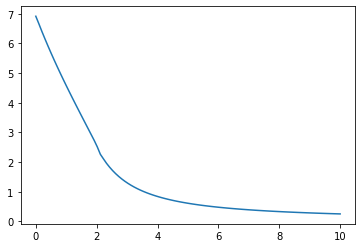

In [3]:
plt.plot(y_grid, e_tilde)

In [ ]:
plt.plot(y_grid, ϕ)
# plt.plot(y_grid, e_tilde)

In [ ]:
v0_guess = ϕ.copy()

**ODE of z**:
$$
0 = \min_h -\delta \eta \log z_2 + \frac{\xi_m}{2}h^\prime h + \frac{d\psi(z_2)}{d z_2}\left[-\rho(z_2-\mu_2) + \sqrt{z_2}\sigma_2 \cdot h\right] + \frac{1}{2}\frac{d^2 \psi(z_2)}{(d z_2)^2}z_2|\sigma_2|^2
$$

The FOC of $h$ gives:
$$
h^* = -\frac{\frac{d\psi(z_2)}{d z_2}\sqrt{z_2}\sigma_2}{\xi_m}
$$

In [ ]:
# Model parameters
η = .032
δ = .01

ρ = 0.9
μ_2 = 1.
σ_2 = 0.013145579 / np.sqrt(1.86/1000)

ξ_m = 1000.

n_z = 100
z_min = np.max([μ_2 - 3*np.sqrt(σ_2**2*μ_2/(2*ρ)), 1e-9])
z_max = μ_2 + 3*np.sqrt(σ_2**2*μ_2/(2*ρ))
z_grid = np.linspace(z_min, z_max, n_z)

model_paras = (η, δ, ρ, μ_2, σ_2, ξ_m) 
ψ = ode_z(z_grid, model_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=2_000)

In [ ]:
plt.plot(z_grid, ψ)